In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

**Crawl Europe brent price data from https://www.eia.gov**

In [3]:
url = 'https://www.eia.gov/dnav/pet/hist/RBRTED.htm'
reponse = requests.get(url)

In [4]:
reponse.status_code

200

In [17]:
doc = BeautifulSoup(reponse.text, 'html.parser')

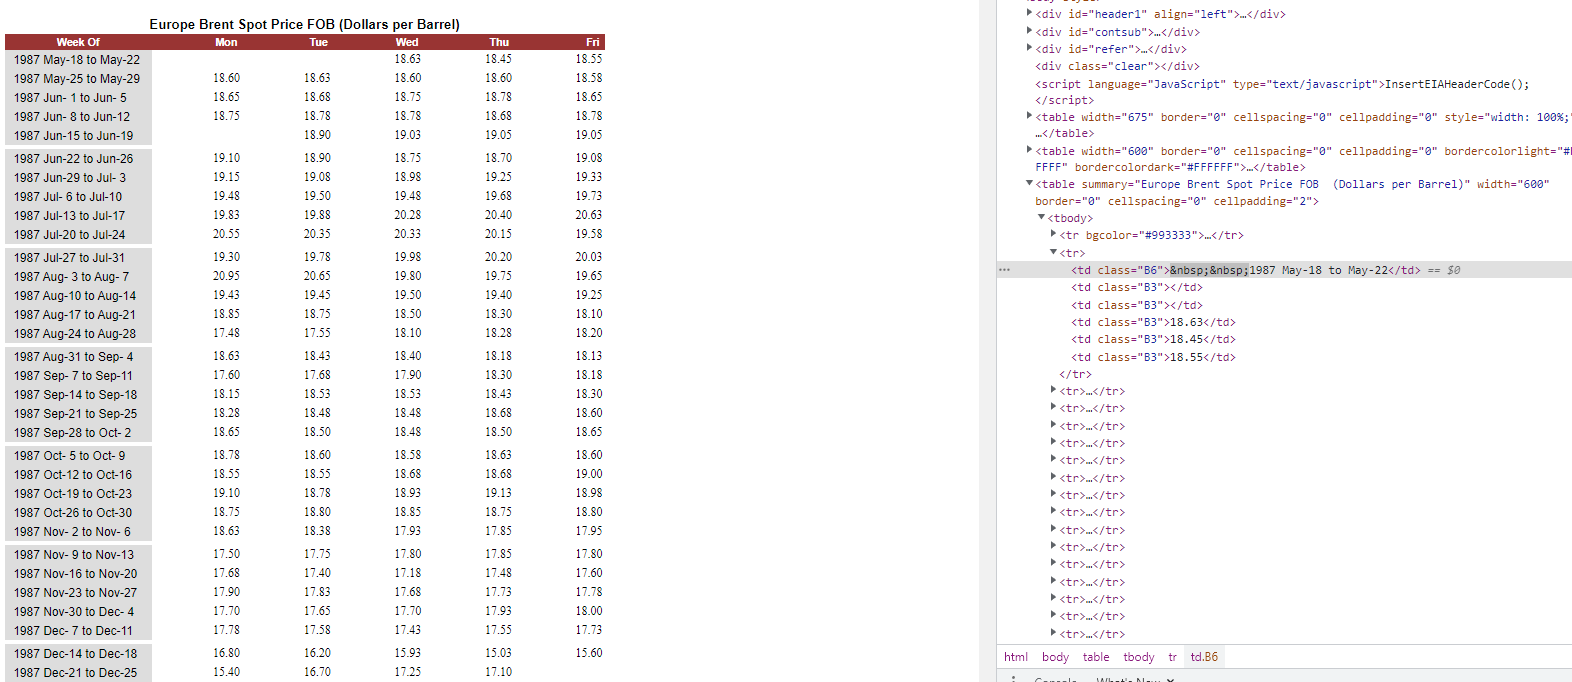

As we can see data in table tag with summary = 'Europe Brent Spot Price FOB  (Dollars per Barrel)'

and row values in tr tags

cells values in td tags

In [18]:
table = doc.find('table', summary = 'Europe Brent Spot Price FOB  (Dollars per Barrel)')

In [7]:
row = table.find_all('tr')

In [23]:
time = []
mon = []
tue = []
wed = []
thu = []
fri = []
for i in range(1,len(row)) :
  a = [a.get_text(strip=True) for a in row[i].find_all('td')]
  time.append(a[0])
  mon.append(a[1])
  tue.append(a[2])
  wed.append(a[3])
  thu.append(a[4])
  fri.append(a[5])

In [211]:
dataoilprice = {
    'Time' : time,
    'Mon' : mon,
    'Tue' : tue,
    'Wed' : wed,
    'Thu' : thu,
    'Fri' :fri
}
dataoilprice = pd.DataFrame(dataoilprice)
dataoilprice.head(7)

,Time,Mon,Tue,Wed,Thu,Fri
0,1987 May-18 to May-22,,,18.63,18.45,18.55
1,1987 May-25 to May-29,18.60,18.63,18.60,18.60,18.58
2,1987 Jun- 1 to Jun- 5,18.65,18.68,18.75,18.78,18.65
3,1987 Jun- 8 to Jun-12,18.75,18.78,18.78,18.68,18.78
4,1987 Jun-15 to Jun-19,,18.90,19.03,19.05,19.05
5,,,,,,
6,1987 Jun-22 to Jun-26,19.10,18.90,18.75,18.70,19.08


Some tags that are used to separate lines are also taken, they have no value. Should be removed

In [212]:
L = dataoilprice.index[dataoilprice['Time'] == ''].tolist()
dataoilprice.drop(L, axis =0, inplace = True)
dataoilprice =dataoilprice.reset_index(drop=True)
dataoilprice.head(7)

,Time,Mon,Tue,Wed,Thu,Fri
0,1987 May-18 to May-22,,,18.63,18.45,18.55
1,1987 May-25 to May-29,18.60,18.63,18.60,18.60,18.58
2,1987 Jun- 1 to Jun- 5,18.65,18.68,18.75,18.78,18.65
3,1987 Jun- 8 to Jun-12,18.75,18.78,18.78,18.68,18.78
4,1987 Jun-15 to Jun-19,,18.90,19.03,19.05,19.05
5,1987 Jun-22 to Jun-26,19.10,18.90,18.75,18.70,19.08
6,1987 Jun-29 to Jul- 3,19.15,19.08,18.98,19.25,19.33


In [189]:
def monthToNum(shortMonth):
    return {
            'jan': 1,
            'feb': 2,
            'mar': 3,
            'apr': 4,
            'may': 5,
            'jun': 6,
            'jul': 7,
            'aug': 8,
            'sep': 9, 
            'oct': 10,
            'nov': 11,
            'dec': 12
    }[shortMonth.lower()]

Remove empty values

In [190]:
import datetime
from dateutil.rrule import rrule, DAILY
import re

In [219]:
# for i in range(0,len(dataoilprice['Time'])):
df = pd.DataFrame(data =[(0,0)], columns =['Time','OilPrice'])
for i in range(0,len(dataoilprice['Time'])):
   a = dataoilprice['Time'][i]
   b = re.findall(r'\w+',a)
   strt_dt = datetime.date(int(b[0]),monthToNum(b[1]),int(b[2]))
   end_dt = datetime.date(int(b[0]),monthToNum(b[4]),int(b[5]))
   dates = [dt for dt in rrule(DAILY, dtstart=strt_dt, until=end_dt)]
   c = [i.date().strftime("%Y-%m-%d") for i in dates]
   for z in range(0,len(c)) :
     d ={'Time': c[z],'OilPrice':dataoilprice.loc[i][z+1]}
     newline = pd.DataFrame(d,index = [i+z/10])
     df = df.append(newline,ignore_index = False)
df = df.sort_index().reset_index(drop=True)
df

,Time,OilPrice
0,0,0
1,1987-05-18,
2,1987-05-19,
3,1987-05-20,18.63
4,1987-05-21,18.45
...,...,...
8996,2022-03-28,114.50
8997,2022-03-29,
8998,2022-03-30,
8999,2022-03-31,


In [231]:
Dropindexlist = df.index[df['OilPrice'] == ''].tolist()
Dropindexlist.append(0)
df.drop(Dropindexlist, axis =0, inplace = True)
df = df.reset_index(drop=True)
df.head(10)

,Time,OilPrice
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
5,1987-05-27,18.60
6,1987-05-28,18.60
7,1987-05-29,18.58
8,1987-06-01,18.65
9,1987-06-02,18.68


In [233]:
df.to_csv('dataset_oilprice.csv', index = None)